<a href="https://colab.research.google.com/github/baaaam771/waliking_binary_classification/blob/main/walking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import time
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.5.0


In [122]:
dataset_name = "UCIHAR" 
data_class_names = ["Walking", "Stairs-Up", "Stairs-Down", "Sitting", "Standing", "Lying"]

# "accelerometer (x,y,z)"  and "gyroscope (x,y,z)". 

dataset_address = "https://raw.githubusercontent.com/mmalekzadeh/dana/master/dana/datasets/"+dataset_name+"/"
X_train = np.load(BytesIO(requests.get(dataset_address + "X_train.npy").content))[:,:,:6]
Y_train = np.load(BytesIO(requests.get(dataset_address + "y_train.npy").content)).argmax(1)   
X_test = np.load(BytesIO(requests.get(dataset_address + "X_test.npy").content))[:,:,:6] 
Y_test = np.load(BytesIO(requests.get(dataset_address + "y_test.npy").content)).argmax(1) 

## Shufflig the training set
rnd_seed = 0
tf.random.set_seed(rnd_seed)
indices = np.random.RandomState(seed=rnd_seed).permutation(len(X_train))
X_train = X_train[indices]
Y_train = Y_train[indices]        



In [123]:
indices

array([3157, 5687, 4140, ..., 1653, 2607, 2732])

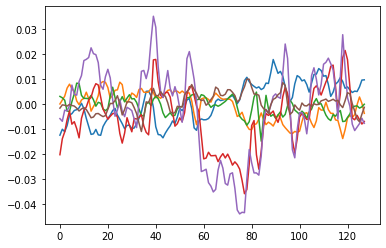

In [124]:
import matplotlib.pyplot as plt
plt.plot(X_train[0])

In [125]:
Y_train[0]

5

In [126]:
X_train.shape

(7352, 128, 6)

In [127]:
X_train.shape[0]

7352

In [128]:
X_train.shape[1]

128

In [129]:
X_train.shape[2]

6

In [130]:
Y_train

array([5, 4, 2, ..., 3, 5, 3])

In [131]:
Y_train.shape

(7352,)

In [132]:
Y_train

array([5, 4, 2, ..., 3, 5, 3])

In [133]:
type(Y_train)

numpy.ndarray

In [134]:
qwe = [0, 1, 2, 3]

In [135]:
qwe

[0, 1, 2, 3]

In [136]:
type(qwe)

list

In [137]:
qwe = np.array(qwe)

In [138]:
qwe

array([0, 1, 2, 3])

In [139]:
type(qwe)

numpy.ndarray

In [140]:
Y_train_change = []

In [141]:
type(Y_train_change)

list

In [142]:
asd=[]

In [143]:
for i in qwe:
  if i == 0 :
    asd.append(0)
  else :
    asd.append(1)

In [144]:
asd

[0, 1, 1, 1]

In [145]:
for i in Y_train:
  if i == 0 :
    Y_train_change.append(0)
  else :
    Y_train_change.append(1)

In [146]:
Y_train_change

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [147]:
Y_train_change = np.array(Y_train_change)

In [148]:
Y_train_change

array([1, 1, 1, ..., 1, 1, 1])

In [149]:
Y_test_change = []

In [150]:
for i in Y_test:
  if i == 0 :
    Y_test_change.append(0)
  else :
    Y_test_change.append(1)

In [151]:
Y_test_change = np.array(Y_test_change)

In [152]:
Y_test_change

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
def DeepOriginal(inp_shape, out_shape):    
    nb_filters = 64 
    drp_out_dns = .5 
    nb_dense = 128 
    
    inp = Input(inp_shape)

    x = Conv2D(nb_filters, kernel_size = (5,1),
              strides=(1,1), padding='valid', activation='relu')(inp)    
    x = Conv2D(nb_filters, kernel_size = (5,1),
              strides=(1,1), padding='valid', activation='relu')(x)
    x = Conv2D(nb_filters, kernel_size = (5,1), 
              strides=(1,1), padding='valid', activation='relu')(x)
    x = Conv2D(nb_filters, kernel_size = (5,1), 
              strides=(1,1), padding='valid', activation='relu')(x)    
    x = Reshape((x.shape[1],x.shape[2]*x.shape[3]))(x)
    
    act = LSTM(nb_dense, return_sequences=True, activation='tanh', name="lstm_1")(x)        
    act = Dropout(drp_out_dns, name= "dot_1")(act)
    act = LSTM(nb_dense, activation='tanh', name="lstm_2")(act)        
    act = Dropout(drp_out_dns, name= "dot_2")(act)
    out_act = Dense(out_shape, activation='sigmoid',  name="act_sigmoid")(act)
    
    model = keras.models.Model(inputs=inp, outputs=out_act)
    return model

In [154]:
X_train = np.expand_dims(X_train,3)
X_test = np.expand_dims(X_test,3)

In [155]:
X_train.shape

(7352, 128, 6, 1)

In [156]:
X_test.shape

(2947, 128, 6, 1)

In [157]:
w = X_train.shape[1]
h = X_train.shape[2]

In [158]:
w

128

In [159]:
h

6

In [160]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5])

In [161]:
np.unique(Y_train_change)

array([0, 1])

In [162]:
tar = np.unique(Y_train_change)-1

In [163]:
org_model = DeepOriginal((w, h, 1), 1)

In [164]:
org_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 6, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 6, 64)        384       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 120, 6, 64)        20544     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 116, 6, 64)        20544     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 6, 64)        20544     
_________________________________________________________________
reshape_2 (Reshape)          (None, 112, 384)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 112, 128)          2626

In [165]:
org_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [166]:
epoch_history = org_model.fit(X_train, Y_train_change, batch_size=128, epochs=50, validation_data=(X_test, Y_test_change) )

Epoch 1/50
58/58 [==============================] - 7s 60ms/step - loss: 0.3623 - accuracy: 0.8218 - val_loss: 0.3009 - val_accuracy: 0.8317
Epoch 2/50
58/58 [==============================] - 3s 46ms/step - loss: 0.2423 - accuracy: 0.8817 - val_loss: 0.1787 - val_accuracy: 0.9311
Epoch 3/50
58/58 [==============================] - 3s 47ms/step - loss: 0.0890 - accuracy: 0.9716 - val_loss: 0.0882 - val_accuracy: 0.9752
Epoch 4/50
58/58 [==============================] - 3s 46ms/step - loss: 0.3911 - accuracy: 0.8232 - val_loss: 0.3039 - val_accuracy: 0.8317
Epoch 5/50
58/58 [==============================] - 3s 47ms/step - loss: 0.2651 - accuracy: 0.8576 - val_loss: 0.3750 - val_accuracy: 0.7601
Epoch 6/50
58/58 [==============================] - 3s 47ms/step - loss: 0.2135 - accuracy: 0.8832 - val_loss: 0.1354 - val_accuracy: 0.9623
Epoch 7/50
58/58 [==============================] - 3s 47ms/step - loss: 0.2322 - accuracy: 0.8987 - val_loss: 0.2151 - val_accuracy: 0.9091
Epoch 8/50
58

In [167]:
org_model.evaluate(X_test, Y_test_change)

93/93 [==============================] - 1s 8ms/step - loss: 0.1940 - accuracy: 0.9759


[0.19398155808448792, 0.9759076833724976]

In [168]:
y_pred = org_model.predict(X_test)

In [169]:
y_pred

array([[0.9999876 ],
       [0.99998784],
       [0.99998796],
       ...,
       [0.9999789 ],
       [0.99992573],
       [0.9999275 ]], dtype=float32)

In [170]:
y_pred = (y_pred > 0.5).astype(int)

In [171]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [172]:
Y_test_change

array([1, 1, 1, ..., 1, 1, 1])

In [173]:
from sklearn.metrics import confusion_matrix

In [174]:
cm = confusion_matrix(Y_test_change, y_pred)

In [175]:
cm

array([[ 435,   61],
       [  10, 2441]])

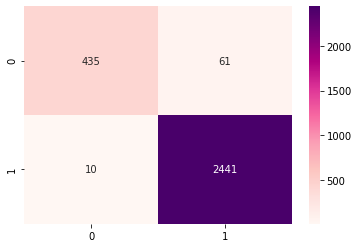

In [176]:
import seaborn as sns
sns.heatmap(data=cm, annot=True, fmt='.0f', cmap='RdPu')
plt.show()